# Heart Disease Prediction
<b>Author:</b> Dr. Vijesh Bhute <br>
<b>Affiliation:</b> Imperial College London <br>
<b>Date last updated:</b> 23/12/2023

## 1: Import Libraries and Dataset

### 1.1 Import libraries

Install libraries if not installed (optional)

In [1]:
#If opendatasets is not installed
#!pip install opendatasets

In [2]:
#Import libraries
import opendatasets as od
import seaborn as sns
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import statistical packages
from scipy.stats import chi2_contingency

In [4]:
#Machine learning packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

### 1.2 Import dataset

This dataset is downloaded from Kaggle. The link to this dataset can be found here: <a href="https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset/data" target="_blank">Cardiovascular disease dataset</a>

<b> Cardiovascular Disease Dataset</b> description

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: center;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
  text-align: left;
}
</style>
</head>
<body>


<table>
  <tr>
    <th>Column name</th>
    <th>Description</th>
    <th>Data type</th>
  </tr>
  <tr>
    <td>patientid</td>
    <td>Patient identification</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Age (years)</td>
    <td>Numeric</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>Gender</td>
    <td>Binary <br>0: Female<br>1: Male</td>
  </tr>
  <tr>
    <td>chestpain</td>
    <td>Type of chest pain</td>
    <td>Categorical <br> 0: Typical angina (chest pain)
        <br>1: Atypical angina
        <br>2: Non-anginal pain
        <br>3: Asymptomatic
    </td>
  </tr>
  <tr>
    <td>restingBP</td>
    <td>Resting Blood Pressure</td>
    <td>Numeric (94-200 mm Hg)</td>
  </tr>
  <tr>
    <td>serumcholestrol</td>
    <td>Serum Cholesterol Level</td>
    <td>Numeric (126-564 mg/dl)</td>
  </tr>
  <tr>
    <td>fastingbloodsugar</td>
    <td>Fasting Blood Sugar</td>
    <td>Binary (0 < 120 mg/dl, 1 > 120 mg/dl)</td>
  </tr>
  <tr>
    <td>restingrelectro</td>
    <td>Resting electrocardiogram results</td>
    <td>Categorical <br>
        0: Normal<br>
        1: Having ST-T wave abnormality <br>
        2: showing probable or definite <br>
        left ventricular hypertrophy <br>
        by Estes' criteria</td>
  </tr>
  <tr>
    <td>maxheartrate</td>
    <td>Maximum heart rate achieved</td>
    <td>Numeric (71-202)</td>
  </tr><tr>
    <td>exerciseangia</td>
    <td>Exercise induced angina (chest pain)</td>
    <td>Binary (0: No, 1: Yes)</td>
  </tr><tr>
    <td>oldpeak</td>
    <td>Oldepeak = ST <br> (measure of abnormality in <br>electrocardiograms)</td>
    <td>Numeric (0-6.2)</td>
  </tr><tr>
    <td>slope</td>
    <td>Slope of the peak exercise ST segment</td>
    <td>Categorical <br>
        1: Upwards slope<br> 
        2: Flat<br>
        3: Downward slope</td>
  </tr><tr>
    <td>noofmajorvessels</td>
    <td>Number of major vessels</td>
    <td>Categorical (0, 1, 2, 3)</td>
  </tr><tr>
    <td>target</td>
    <td>Classification</td>
    <td>Categorical <br>
        0: Absence of heart disease<br> 
        1: Presence of heart disease</td>
  </tr>
</table>

</body>
</html>



Slope and oldpeak are related as they are both associated with similar test (ST).

### 1.1 Download dataset using Kaggle API (Optional)

Skip this step if running from GitHub. The folder containing data will already be provided in the dataset folder

In [5]:
#od.download(
#    "https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset/data")

### 1.2 Create a Pandas dataframe

In [6]:
file =('input\Cardiovascular_Disease_Dataset.csv')
dataset = pd.read_csv(file)

In [7]:
dataset.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [8]:
#Dictionary to keep numerical and catgorical features
datatype_dict = {"numeric": ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"], 
                "categorical": ["gender", "chestpain", "fastingbloodsugar", "restingrelectro", 
                               "exerciseangia", "slope", "noofmajorvessels", "target"]}

## 2: Data Exploration and Cleaning

### 2.1 Check for null values

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [10]:
#for column in dataset.columns:
#    if sum(dataset[column].isna())>0: #Only store those where there are null entries
#        print(column, 'contains null entries')

There are no null values. 

### 2.2 Check if any patient IDs are duplicated by error:

In [11]:
if dataset['patientid'].nunique() == dataset['patientid'].count():
    print('All patient IDs are unique')
else:
    print('There are duplicate patient IDs!')

All patient IDs are unique


### 2.3 Check for any anomalies in data

In [12]:
dataset.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


#### 2.3.1 Potential anomalies:
<ul>
    <li>Serum cholesterol has a minimum value of $0$ which doesn't seem right</li>
    <li>Slope feature is expected to have three categories: 1: upwards, 2: flat, and 3: downwards. But the minimum value for slope is showing to be 0! This doesn't make sense. This needs to be raised with the data provider. </li>
    </ul>

In [13]:
#Check how many values in serum cholesterol are 0
dataset['serumcholestrol'].value_counts().sort_index()

0      53
85      1
86      4
87      2
132     6
       ..
559     3
560     1
561     2
601     3
602     2
Name: serumcholestrol, Length: 344, dtype: int64

<b>There are 53 individuals for whom the serum cholesterol is recorded to be 0 which doesn't seem right. </b>

In [14]:
#Check how many values in slope feature are 0
dataset['slope'].value_counts().sort_index()

0    180
1    299
2    322
3    199
Name: slope, dtype: int64

<b>There are 180 individuals for whom the slope is stated to be 0. Due to unknown nature of this category, it might be best to exclude them from the analysis until more information is made available. </b>

#### 2.3.2 Plotting distributions

For numeric features, plotting the distribution using box plots.

<Axes: >

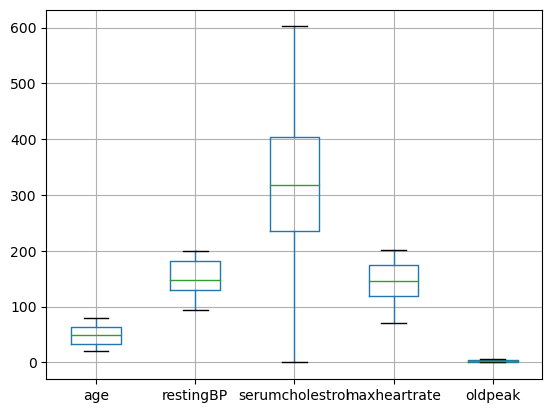

In [15]:
dataset.boxplot(column = datatype_dict["numeric"])

<Axes: >

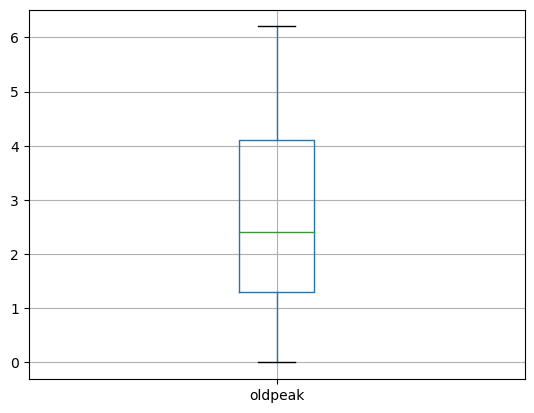

In [16]:
dataset.boxplot(column = "oldpeak") #Plotting oldpeak again as it was difficult to visualise in above plot

For categorical features, histogram is more suitable way to look at the data:

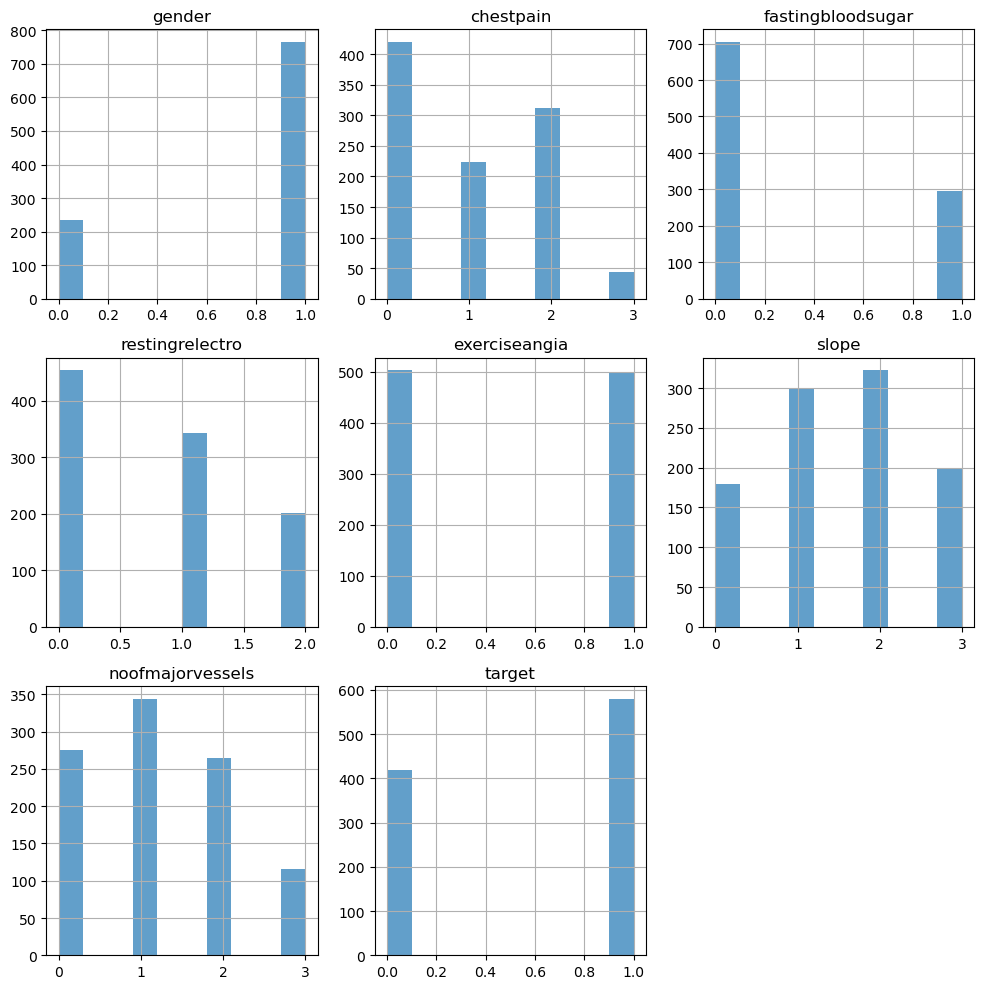

In [17]:
dataset.hist(column = datatype_dict["categorical"], alpha=0.7, figsize=(10, 10))
plt.tight_layout()

In [18]:
sum(dataset.gender)

765

In [19]:
sum(dataset.fastingbloodsugar)

296

<b>Following insights can be drawn by looking at the distribution of these features:</b>
<ul>
    <li>For 53 individuals, Serum cholesterol is 0 which implies incorrect sample collection or data entering. These individuals could be potentially considered outliers as the number is not huge when compared to the size of the dataset (5.3%) and assigning a certain value for serum cholesterol may lead to incorrect model results. </li>
    <li>There are more males (76.5%) as compared to females (23.5%) in the dataset. This suggests that males are more likely to go to hospital for chest pain as compared to females. Consequently, it might also be interpreted that men are more likely to have heart disease.</li>
    <li>There is also a higher representation of individuals with normal fasting blood sugar (70.4%) as compared to those with high fasting blood sugar (29.6%). </li>
    <li>It is also clear that majority of individuals (>95%) have some form of chestpain as compared to asymptomatic. </li></ul>

### 2.4 Data cleaning

Dropping rows where serum cholesterol was 0.

In [20]:
dataset = dataset[dataset['serumcholestrol']>0]
dataset.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,9.470000e+02,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,5.081857e+06,49.300950,0.764520,0.972545,151.072862,328.877508,0.312566,0.730729,145.009504,0.502640,2.700845,1.504752,1.202746,0.556494
std,2.886946e+06,17.887398,0.424523,0.958596,30.068877,113.073251,0.463784,0.765492,34.475762,0.500257,1.706826,1.007755,0.975965,0.497061
min,1.192500e+05,20.000000,0.000000,0.000000,94.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.545688e+06,34.000000,1.000000,0.000000,128.000000,248.000000,0.000000,0.000000,118.000000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.994167e+06,49.000000,1.000000,1.000000,144.000000,326.000000,0.000000,1.000000,145.000000,1.000000,2.400000,2.000000,1.000000,1.000000
75%,7.697459e+06,65.000000,1.000000,2.000000,180.500000,410.000000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.000000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


<Axes: >

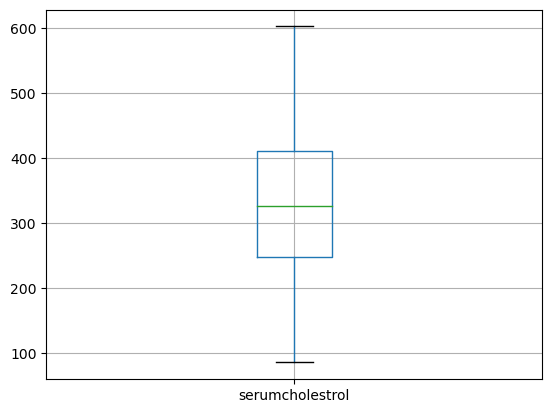

In [21]:
dataset.boxplot(column = "serumcholestrol") 

Dropping rows where slope is 0. 

In [22]:
dataset = dataset[dataset['slope']>0]
dataset.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,7.670000e+02,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,5.085477e+06,49.169492,0.737940,1.122555,155.485007,341.316819,0.358540,0.822686,146.771838,0.507171,2.833507,1.857888,1.391134,0.687093
std,2.878209e+06,17.644960,0.440042,0.959003,29.021725,116.087929,0.479885,0.786543,32.494970,0.500275,1.700802,0.772833,0.959125,0.463980
min,1.192500e+05,20.000000,0.000000,0.000000,94.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.545688e+06,34.000000,0.000000,0.000000,133.000000,249.000000,0.000000,0.000000,123.000000,0.000000,1.500000,1.000000,1.000000,0.000000
50%,4.989253e+06,49.000000,1.000000,1.000000,154.000000,340.000000,0.000000,1.000000,148.000000,1.000000,2.600000,2.000000,1.000000,1.000000
75%,7.685355e+06,64.000000,1.000000,2.000000,184.000000,432.000000,1.000000,1.000000,174.000000,1.000000,4.200000,2.000000,2.000000,1.000000
max,9.988507e+06,80.000000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          767 non-null    int64  
 1   age                767 non-null    int64  
 2   gender             767 non-null    int64  
 3   chestpain          767 non-null    int64  
 4   restingBP          767 non-null    int64  
 5   serumcholestrol    767 non-null    int64  
 6   fastingbloodsugar  767 non-null    int64  
 7   restingrelectro    767 non-null    int64  
 8   maxheartrate       767 non-null    int64  
 9   exerciseangia      767 non-null    int64  
 10  oldpeak            767 non-null    float64
 11  slope              767 non-null    int64  
 12  noofmajorvessels   767 non-null    int64  
 13  target             767 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 89.9 KB


<b>There are 767 individuals after data cleaning (excluded 23.3% data points)</b>

## 3: Univariate statistics and Correlation analysis

### 3.1 Correlation analysis
Below function plots the correlation matrix which is input. 

Text(0.5, 1.0, 'Correlation matrix')

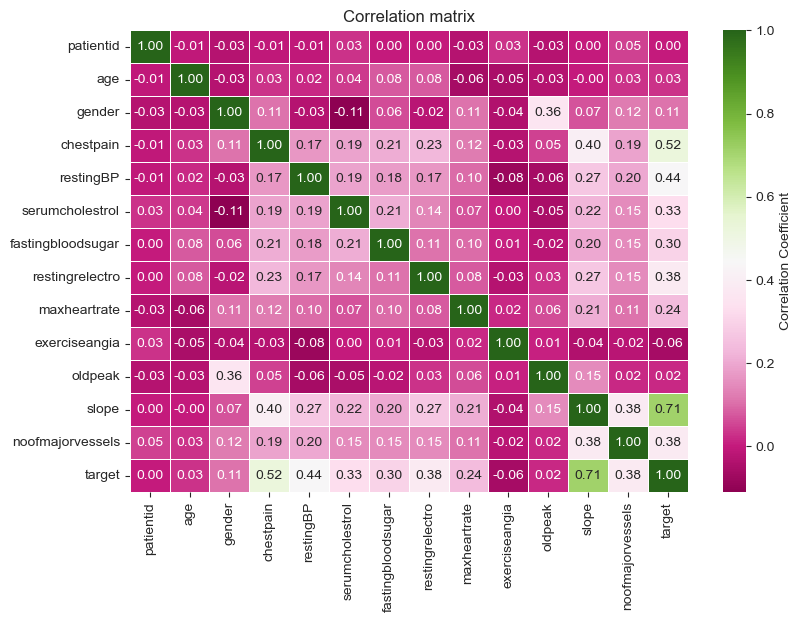

In [24]:
corr_matrix = dataset.corr().round(2)
plt.figure(figsize = (9,6))
sns.set_style('ticks')
sns.heatmap(corr_matrix, annot=True, fmt = '0.2f', linewidth = 0.5, 
            cmap="PiYG", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation matrix')

<ul>
    <li>I have intentionally included patientid as I expect this to not be correlated with any other feature. This is consistent with what I would expect. </li>
    <li><b> Surprising findings: </b> Age doesn't seem to be correlated with other features which is quite interesting. I would have expected that some features to be positively or negatively correlated with age but that isn't the case. </li>
<li><b> Not so surprising findings: </b> There is positive correlation of various parameters including Slope of the peak exercise ST segment, chestpain, number of major vessels, resting BP, etc. which are likely associated with the heart function and therefore, make sense. </li> 

In [25]:
#removing patientid from analysis
dataset2 = dataset.drop(['patientid'], axis = 1) 
dataset2.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0


### 3.2 $\chi ^2$ test for checking significance of relationships between target and categorical features

In [26]:
chisquare_dict ={}
chisquare_dict["categorical"] = datatype_dict['categorical'][:-1]
chisquare_dict["statistic"]=[]
chisquare_dict["pvalue"]=[]
chisquare_dict["-log10(pvalue)"]=[]

In [27]:
#print('The null hypothesis is that there is no relationship between target and categorical features')
for feature in datatype_dict['categorical']:
    if feature != 'target':
        crosstab_data = pd.crosstab(dataset[str(feature)], dataset["target"], margins = False)
        res = chi2_contingency(crosstab_data) 
        chisquare_dict["statistic"].append(res.statistic)
        chisquare_dict["pvalue"].append(res.pvalue)
        chisquare_dict["-log10(pvalue)"].append(round(-math.log10(res.pvalue),2))
        
        plot = False #Make this false if not interested in plotting these
        if plot: #Plot significant relationships
            if res.pvalue < 0.05:
                dataset.groupby('target')[str(feature)].value_counts().unstack(0).plot.bar()
                plt.title('-log10 p-value: '+ str(round(-math.log10(res.pvalue),2)))

In [28]:
chi2_univariate_stats = pd.DataFrame(chisquare_dict)
chi2_univariate_stats_sorted=chi2_univariate_stats.sort_values(by = "-log10(pvalue)", ascending = False)
chi2_univariate_stats_sorted.reset_index(drop=True, inplace = True)
chi2_univariate_stats_sorted

,categorical,statistic,pvalue,-log10(pvalue)
0,slope,483.874157,8.473482e-106,105.07
1,chestpain,238.488076,2.020484e-51,50.69
2,noofmajorvessels,145.417317,2.565874e-31,30.59
3,restingrelectro,112.767265,3.257614e-25,24.49
4,fastingbloodsugar,67.375332,2.244397e-16,15.65
5,gender,8.646916,3.276155e-03,2.48
6,exerciseangia,2.320131,1.277093e-01,0.89


Above dataframe summarises the $\chi ^2$ test to compare whether there is any relationship between the categorical features and the target. 
<ul>
    <li>Slope is very significantly associated with presence of heart disease. An upwards slope (1) can indicate absence of heart disease while a downward slope (3) exclusively indicates presence of disease. A flat slope is more likely to indicate presence of disease. I expect slope to be a major feature when building the ML models. </li></ul>  

### 3.3 Logistic regression for analysing relationship between numerical features and target (Univariate analysis)

Logistic regression can be sensitive to differences in scale of the numerical features. Therefore, performing scaling is important before performing these statistical tests.

In [29]:
sc = StandardScaler()
columns = datatype_dict["numeric"]
X_transformed = sc.fit_transform(dataset2[columns])
target = dataset2["target"].values

In [30]:
#Initialise model
model = LogisticRegression(random_state = 0) 

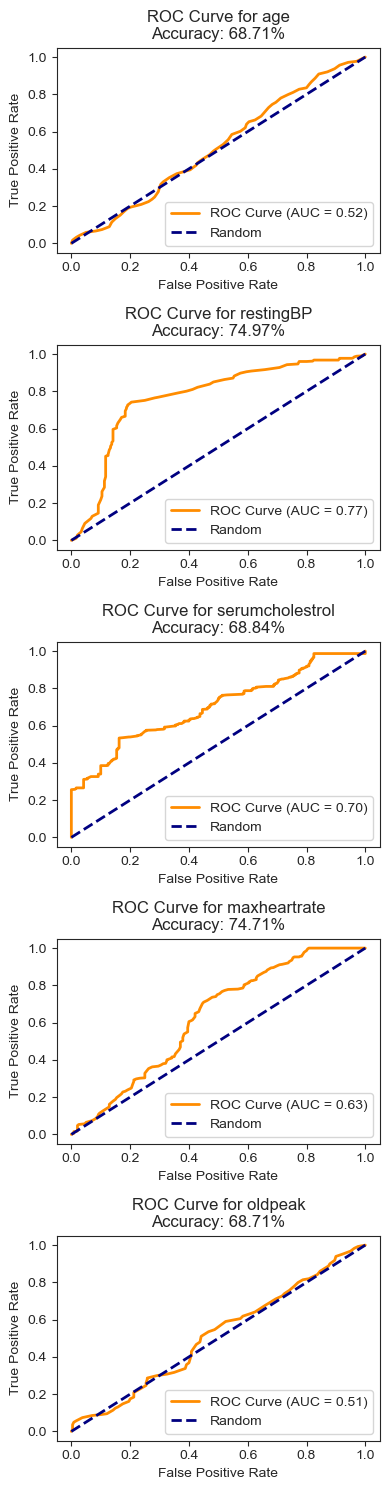

In [31]:
#Plotting ROC curves with different numeric features
log_regression_stats = {}
log_regression_stats["numeric"] = datatype_dict["numeric"]
log_regression_stats["Accuracy"] = []
log_regression_stats["ROC_AUC"] = []

fig, axs = plt.subplots(len(datatype_dict["numeric"]), figsize = (4,15))

for feature in range(len(columns)):
    X_data = X_transformed[:,feature].reshape(-1,1)
    model.fit(X_data, target)
    y_pred = model.predict(X_data)
    accuracy = accuracy_score(target, y_pred)
    log_regression_stats["Accuracy"].append(accuracy)
    #print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    #Plotting ROC curve
    y_prob = model.predict_proba(X_data)[:, 1]
    fpr, tpr, thresholds = roc_curve(target, y_prob)
    roc_auc = auc(fpr, tpr)
    log_regression_stats["ROC_AUC"].append(round(roc_auc,2))
    #plt.figure(figsize=(5, 5))
    axs[feature].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axs[feature].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    axs[feature].set_xlabel('False Positive Rate')
    axs[feature].set_ylabel('True Positive Rate')
    axs[feature].set_title('ROC Curve for '+ str(columns[feature])+
              '\nAccuracy: '+str(round(accuracy * 100,2))+'%')
    axs[feature].legend(loc="lower right")
    #plt.show()
plt.tight_layout()

In [32]:
log_regression_stats_df = pd.DataFrame(log_regression_stats)
log_regression_stats_df_sorted=log_regression_stats_df.sort_values(by = "ROC_AUC", ascending = False)
log_regression_stats_df_sorted.reset_index(drop=True, inplace = True)
log_regression_stats_df_sorted

,numeric,Accuracy,ROC_AUC
0,restingBP,0.749674,0.77
1,serumcholestrol,0.688396,0.70
2,maxheartrate,0.747066,0.63
3,age,0.687093,0.52
4,oldpeak,0.687093,0.51


Among the numerical features, resting BP is most promising with a high AUC (0.77). Again this makes sense as a high resting blood pressure indicates high BP and individuals with high BP are more likely to have heart disease. 

## 5: Applying Machine learning

Ideally, the model should be interpretable to be used by clinicians. Also, considering the size of the dataset, it makes sense to use simpler models such as Logistic regression, Decision trees, etc. 

### 5.1 Split dataset into training and test set

In [33]:
X_train, X_test,y_train, y_test = train_test_split(dataset2.iloc[:,:-1], target, test_size = 0.2, random_state = 0)
split_info = [len(y_train), len(y_test)]
split_info

[613, 154]

### 5.2 Scaling training set and applying similar scaling to test set

In [34]:
X_train = sc.fit_transform(X_train) #Standard scaling of all features in the training set
X_test = sc.transform(X_test) #Same scaling parameters as the training set

In [35]:
features = dataset.columns[1:13]
scaling_mean = sc.mean_
scaling_scale = sc.scale_
scaling_dict = {'Feature': features, 'Mean': scaling_mean, 'Scale': scaling_scale}
scaling_dict_df = pd.DataFrame(scaling_dict)
scaling_dict_df

,Feature,Mean,Scale
0,age,48.866232,17.648971
1,gender,0.732463,0.442675
2,chestpain,1.127243,0.957562
3,restingBP,156.194127,28.832924
4,serumcholestrol,342.427406,115.791369
5,fastingbloodsugar,0.355628,0.478703
6,restingrelectro,0.815661,0.777088
7,maxheartrate,146.840131,32.074707
8,exerciseangia,0.505710,0.499967
9,oldpeak,2.799347,1.677371


### 5.3 Losgitic regression

### 5.3.1 Feature Selection: Using Lasso regularisation

In [36]:
#Using Lasso regularisation to identify non-relevant features
logModel = LogisticRegression(penalty = 'l1',solver = 'liblinear', random_state = 0)  
logModel.fit(X_train, y_train)
y_pred_train = logModel.predict(X_train)
print("Accuracy of the logistical regression model on training set: ", 
      round(accuracy_score(y_train, y_pred_train)*100,2), "%")
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

Accuracy of the logistical regression model on training set:  97.23 %
[[176   9]
 [  8 420]]


In [37]:
#Cross-validation accuracy
kfold = 10
accuraciesLog = cross_val_score(estimator = logModel, X=X_train, y=y_train, cv=kfold)
print("Average accuracy from 10-fold cross-validation:", round(np.mean(accuraciesLog)*100,2), "%")

Average accuracy from 10-fold cross-validation: 96.26 %


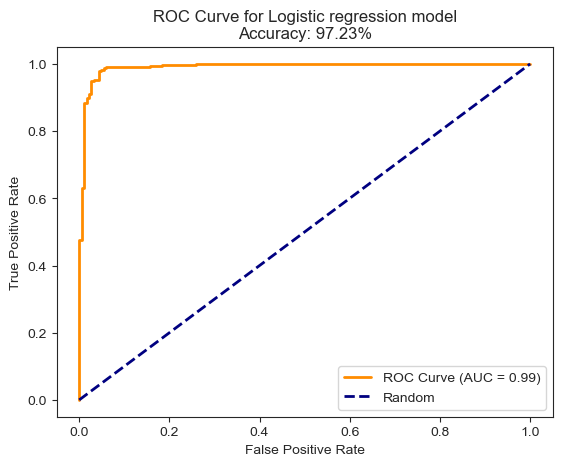

In [38]:
#Plotting ROC curve
accuracy = accuracy_score(y_train, y_pred_train)
y_prob = logModel.predict_proba(X_train)[:, 1]
y_prob.shape
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)
#plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic regression model'+
          '\nAccuracy: '+str(round(accuracy * 100,2))+'%')
plt.legend(loc="lower right")

In [39]:
y_pred_test= logModel.predict(X_test) #Predicting test set
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy of the logistical regression model on test set: ", 
      round(accuracy_score(y_test, y_pred_test)*100,2), "%")
print(cm)

Accuracy of the logistical regression model on test set:  94.16 %
[[50  5]
 [ 4 95]]


In [40]:
model_summary = {}
model_summary['feature'] = []
model_summary['coeff'] = []

for i in range(len(dataset2.columns[:-1])):
    model_summary['feature'].append(dataset2.columns[i])
    model_summary['coeff'].append(logModel.coef_[0][i])
model_summary_df = pd.DataFrame(model_summary)
model_summary_df_sorted=model_summary_df.sort_values(by = "coeff", ascending = False)
model_summary_df_sorted.reset_index(drop=True, inplace = True)
model_summary_df_sorted

,feature,coeff
0,slope,4.582891
1,gender,1.016716
2,chestpain,0.978394
3,restingBP,0.869473
4,restingrelectro,0.732622
5,fastingbloodsugar,0.493508
6,maxheartrate,0.461481
7,serumcholestrol,0.435929
8,noofmajorvessels,0.016658
9,exerciseangia,0.000000


Text(0, 0.5, 'Coefficient of feature in Log Regression model \n with Lasso (l1) regularisation')

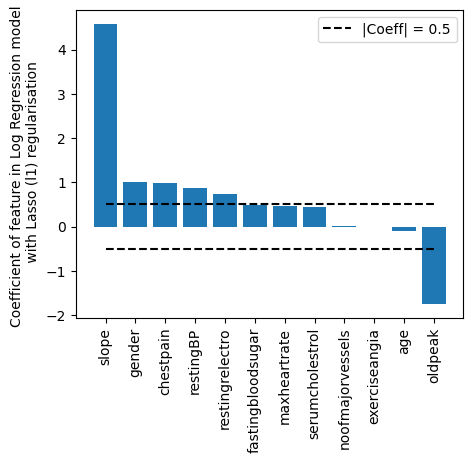

In [41]:
# plot the coefficient of each feature in the logistical regression model with lasso regularisation
plt.figure(figsize=(5, 4))
plt.rcdefaults()
plt.bar(model_summary_df_sorted['feature'], model_summary_df_sorted['coeff'])
plt.plot(model_summary_df_sorted['feature'], [0.5]*len(model_summary_df_sorted['feature']), 
         '--k', label = '|Coeff| = 0.5')
plt.plot(model_summary_df_sorted['feature'], [-0.5]*len(model_summary_df_sorted['feature']),'--k')
plt.xticks(rotation = 90) 
plt.legend(loc = 'best')
plt.ylabel('Coefficient of feature in Log Regression model \n with Lasso (l1) regularisation')

Using Lasso regularisation method, exercise angina has a coefficient of 0 indicating that this feature is not relevant for the model. 

The above plot of coefficients of various features further highlights a positive relationship between slope (downward slope) and presence of heart disease. Similarly a larger value of oldpeak (which corresponds to a dip in the ECG ST Depression plot) is associated wih absence of heart disease. This is related to the heart physiology and is consistent with existing knowledge in the field. 

By arbitrarily choosing a cut-off of 0.5, we expect the following features to be of high relevance:
<ul>
    <li>slope</li>
    <li>oldpeak</li>
    <li>gender</li>
    <li>chestpain</li>
    <li>restingBP</li>
    <li>restingrelectro</li>
    </ul>

In [42]:
X_train_lasso = np.delete(X_train, np.s_[0,4,5,7,8,11], axis = 1) 
X_test_lasso = np.delete(X_test, np.s_[0,4,5,7,8,11], axis = 1) 

In [43]:
logModel = LogisticRegression(random_state = 0)  
logModel.fit(X_train_lasso, y_train)
y_pred_train = logModel.predict(X_train_lasso)
print("Accuracy of the logistical regression model on training set: ", 
      round(accuracy_score(y_train, y_pred_train)*100,2), "%")
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

Accuracy of the logistical regression model on training set:  95.92 %
[[171  14]
 [ 11 417]]


In [44]:
#Cross-validation accuracy
kfold = 10
accuraciesLog = cross_val_score(estimator = logModel, X=X_train_lasso, y=y_train, cv=kfold)
print("Average accuracy from 10-fold cross-validation:", round(np.mean(accuraciesLog)*100,2), "%")

Average accuracy from 10-fold cross-validation: 95.6 %


In [45]:
y_pred_test= logModel.predict(X_test_lasso) #Predicting test set
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy of the logistical regression model on test set: ", 
      round(accuracy_score(y_test, y_pred_test)*100,2), "%")
print(cm)

Accuracy of the logistical regression model on test set:  93.51 %
[[51  4]
 [ 6 93]]


<b>By going from 12 features to 6 features, the loss in accuracy is very small. It might be better to go with fewer features to avoid issues with high dimensionality and difficulty in interpreting results.</b>

### 5.3.2 Feature Selection: Backward elimination

Let's check if we get similar features by using backward elimination method for feature selection. 

In [46]:
logModel = LogisticRegression(random_state=0)
sfs = SequentialFeatureSelector(logModel, n_features_to_select="auto", tol =-0.01, direction = 'backward')
sfs.fit(X_train, y_train)
sfs.get_support()

array([False,  True,  True, False, False, False,  True, False, False,
        True,  True, False])

In [47]:
print("The following features are selected based on backwards elimination:\n",
      model_summary_df['feature'][sfs.get_support()])

The following features are selected based on backwards elimination:
 1              gender
2           chestpain
6     restingrelectro
9             oldpeak
10              slope
Name: feature, dtype: object


In [48]:
#Choosing the features based on backward elimination
X_train_back = np.delete(X_train, np.s_[0,3,4,5,7,8,11], axis = 1) 
X_test_back = np.delete(X_test, np.s_[0,3,4,5,7,8,11], axis = 1) 

In [49]:
logModel = LogisticRegression(random_state = 0)  
logModel.fit(X_train_back, y_train)
y_pred_train = logModel.predict(X_train_back)
print("Accuracy of the logistical regression model on training set: ", 
      round(accuracy_score(y_train, y_pred_train)*100,2), "%")
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

Accuracy of the logistical regression model on training set:  96.25 %
[[174  11]
 [ 12 416]]


In [50]:
#Cross-validation accuracy
kfold = 10
accuraciesLog = cross_val_score(estimator = logModel, X=X_train_back, y=y_train, cv=kfold)
print("Average accuracy from 10-fold cross-validation:", round(np.mean(accuraciesLog)*100,2), "%")

Average accuracy from 10-fold cross-validation: 96.09 %


In [51]:
y_pred_test= logModel.predict(X_test_back) #Predicting test set
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy of the logistical regression model on test set: ", 
      round(accuracy_score(y_test, y_pred_test)*100,2), "%")
print(cm)

Accuracy of the logistical regression model on test set:  93.51 %
[[48  7]
 [ 3 96]]


In [52]:
model_summary_df['feature'][sfs.get_support()]

1              gender
2           chestpain
6     restingrelectro
9             oldpeak
10              slope
Name: feature, dtype: object

Interestingly, by using just 5 features (gender, chest pain, resting ECG result, oldpeak and slope), we get similar test set accuracy and a 10-fold cross validation accuracy as the original model with 12 features. <br><b> I will use these five features to build other classification models:</b>

### 5.4 Comparing with other classification models

In [53]:
#Initialise models
logModel = LogisticRegression(random_state = 0)  
logModel.fit(X_train_back, y_train)
y_predict_logModel= logModel.predict(X_test_back) #Predicting test set
    
kNN = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p=2)
#minkowski with p=2 corresponds to Euclidean distance
kNN.fit(X_train_back, y_train)
y_predict_kNN=kNN.predict(X_test_back)
    
LinearSVMmodel = SVC(kernel='linear', random_state = 0)
LinearSVMmodel.fit(X_train_back, y_train)
y_predict_LinSVM=LinearSVMmodel.predict(X_test_back)
    
kSVMmodel = SVC() #default kernel is rbf (radial basis function)
kSVMmodel.fit(X_train_back, y_train)
y_predict_kSVM=kSVMmodel.predict(X_test_back)

NBmodel = GaussianNB()
NBmodel.fit(X_train_back,y_train)
y_predict_NB= NBmodel.predict(X_test_back)   
    
DecTreeModel= DecisionTreeClassifier()
DecTreeModel.fit(X_train_back,y_train)
y_predict_DecTree= DecTreeModel.predict(X_test_back)

RFModel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RFModel.fit(X_train_back, y_train)
y_predict_RF= RFModel.predict(X_test_back)

In [54]:
#Cross validation accuracy
kfold = 10
accuraciesLog = cross_val_score(estimator = logModel, X=X_train_back, y=y_train, cv=kfold)
accuracieskNN = cross_val_score(estimator = kNN, X=X_train_back, y=y_train, cv=kfold)
accuraciesLSVM = cross_val_score(estimator = LinearSVMmodel, X=X_train_back, y=y_train, cv=kfold)
accuraciesKSVM = cross_val_score(estimator = kSVMmodel, X=X_train_back, y=y_train, cv=kfold)
accuraciesNB = cross_val_score(estimator = NBmodel, X=X_train_back, y=y_train, cv=kfold)
accuraciesDT = cross_val_score(estimator = DecTreeModel, X=X_train_back, y=y_train, cv=kfold)
accuraciesRF = cross_val_score(estimator = RFModel, X=X_train_back, y=y_train, cv=kfold)

In [55]:
#Putting it in a dataframe
datAccuracyTraining = np.array([logModel.score(X_train_back, y_train), kNN.score(X_train_back, y_train), 
                                LinearSVMmodel.score(X_train_back,y_train), kSVMmodel.score(X_train_back,y_train), 
                                NBmodel.score(X_train_back,y_train), DecTreeModel.score(X_train_back, y_train), 
                                RFModel.score(X_train_back,y_train)])

datAccuracyTest = np.array([logModel.score(X_test_back, y_test), kNN.score(X_test_back,y_test), 
                            LinearSVMmodel.score(X_test_back,y_test), kSVMmodel.score(X_test_back,y_test), 
                            NBmodel.score(X_test_back,y_test), DecTreeModel.score(X_test_back, y_test),
                            RFModel.score(X_test_back,y_test)])

crossVal_Accuracy =  np.array([accuraciesLog.mean(), accuracieskNN.mean(), accuraciesLSVM.mean(), 
                               accuraciesNB.mean(), accuraciesDT.mean(), accuraciesRF.mean(), 
                               accuraciesKSVM.mean()])
    
crossVal_std =  np.array([accuraciesLog.std(), accuracieskNN.std(), accuraciesLSVM.std(), 
                          accuraciesNB.std(), accuraciesDT.std(), accuraciesRF.std(), 
                          accuraciesKSVM.std()])
#Round and convert to percentage
datAccuracyTraining = np.around(datAccuracyTraining*100, decimals = 2)
datAccuracyTest = np.around(datAccuracyTest*100, decimals = 2)
crossVal_Accuracy = np.around(crossVal_Accuracy*100, decimals =2)
crossVal_std = np.around(crossVal_std*100, decimals = 2 )
#Label columns and prepare the data for dataframe
dat = {'Model name':['Log Regression', 'kNN', 
                     'Linear SVM', 'Kernel SVM', 
                     'Naive Bayes', 'Decision Trees', 
                     'Random Forests'], 
       'Training set Accuracy':datAccuracyTraining, 
       'Test set Accuracy':datAccuracyTest, 
       'Cross-validation Accuracy (mean)': crossVal_Accuracy,
       'Cross-validation Accuracy (std)': crossVal_std}
#Create a dataframe
accuracyDF = pd.DataFrame(data = dat)
accuracyDF

,Model name,Training set Accuracy,Test set Accuracy,Cross-validation Accuracy (mean),Cross-validation Accuracy (std)
0,Log Regression,96.25,93.51,96.09,1.48
1,kNN,96.08,92.86,94.94,1.54
2,Linear SVM,96.08,93.51,95.76,1.65
3,Kernel SVM,95.92,96.75,92.50,1.96
4,Naive Bayes,92.50,90.91,93.15,2.87
5,Decision Trees,99.18,89.61,94.78,2.39
6,Random Forests,99.18,91.56,95.27,1.55


<ul>
    <li> Comparing other classification models, it seems that Logistic regression performs well. </li>
    <li>Decision trees and Random forests overfit the training set and have low test set accuracy. </li>
    <li>Linear SVM and Kernel SVM perform similar or better than Logistic regression but lack interpretability. </li>
    </ul>

It is better to use Logistic regression if interpretability is the priority. 

### 5.5 Hyperparameter tuning for Logistic regression model

In [56]:
logModel = LogisticRegression(random_state = 0)

#Grid search to find best choice of C and solver
param = {'C': [0.01,0.1, 1, 10, 100], 
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gs_model = GridSearchCV(estimator=logModel, param_grid=param)
gs_model.fit(X_train_back, y_train)
print('The best parameters from Grid search are:', gs_model.best_params_)
# Train the model with best parameters    
bestlogModel = LogisticRegression(**gs_model.best_params_, random_state = 0)
bestlogModel.fit(X_train_back, y_train)
coefficient = bestlogModel.coef_[0]
#Cross validation accuracy
accuraciesLog = cross_val_score(estimator = bestlogModel, X=X_train_back, y=y_train, cv=kfold)*100
print("Average accuracy from 10-fold cross-validation on training set:", round(np.mean(accuraciesLog),2), "%")
print("Test set accuracy:", round(bestlogModel.score(X_test_back, y_test)*100,2),'%')

The best parameters from Grid search are: {'C': 1, 'solver': 'lbfgs'}
Average accuracy from 10-fold cross-validation on training set: 96.09 %
Test set accuracy: 93.51 %


Performing a finer search for C

In [57]:
logModel = LogisticRegression(solver = 'lbfgs', random_state = 0)
a = np.linspace(0.1,10,100) #100 values of C between 0.1 and 10 with an interval of 0.1.
param = {'C': a}
gs_model = GridSearchCV(estimator=logModel, param_grid=param)
gs_model.fit(X_train_back, y_train)
print('The best value of C from Grid search is:', round(gs_model.best_params_['C'],2))
# Train a LR model with best parameters    
bestlogModel = LogisticRegression(**gs_model.best_params_, solver = 'lbfgs', random_state = 0)
bestlogModel.fit(X_train_back, y_train)
coefficient = bestlogModel.coef_[0]
#Cross validation accuracy
kfold = 10
accuraciesLog = cross_val_score(estimator = bestlogModel, X=X_train_back, y=y_train, cv=kfold)*100
print("Average accuracy from 10-fold cross-validation on training set:", round(np.mean(accuraciesLog),2), "%")
print("Test set accuracy:", round(bestlogModel.score(X_test_back, y_test)*100,2),'%')

The best value of C from Grid search is: 0.7
Average accuracy from 10-fold cross-validation on training set: 96.09 %
Test set accuracy: 94.16 %


In [58]:
y_pred_train= bestlogModel.predict(X_train_back) #Predicting test set
cm = confusion_matrix(y_train, y_pred_train)
print("Accuracy of the final logistical regression model on training set: ", 
      round(accuracy_score(y_train, y_pred_train)*100,2), "%")
print(cm)
y_pred_test= bestlogModel.predict(X_test_back) #Predicting test set
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy of the final logistical regression model on test set: ", 
      round(accuracy_score(y_test, y_pred_test)*100,2), "%")
print(cm)

Accuracy of the final logistical regression model on training set:  96.25 %
[[174  11]
 [ 12 416]]
Accuracy of the final logistical regression model on test set:  94.16 %
[[49  6]
 [ 3 96]]


<b>C = 0.7, solver = 'lbfgs' </b>lead to a slightly better test set accuracy. 

Above model predictions are by choosing a probability cut-off of 0.5, that is, if p>0.5, the individual will be categorised to have heart disease. 

### 5.6 Finding optimal cutoff

The default cut-off doesn't necessarily lead to best predictions. I will aim to find a threshold which can lead to improvement in test accuracy.

In [59]:
thresholds = np.linspace(0,1,1001) #1001 points between 0 and 1
#Get probabilities from Logistic regression model for the test set
y_prob_test = bestlogModel.predict_proba(X_test_back)
accuracy_thres_test = []
for thres in thresholds:
    y_pred_thres_test = np.where(y_prob_test > thres,1,0)[:,1]
    accuracy_thres_test.append(accuracy_score(y_test, y_pred_thres_test))

optimal_threshold = thresholds[accuracy_thres_test.index(max(accuracy_thres_test))]    
print('Threshold for probability which leads to maximum accuracy in test set is:', optimal_threshold)
print('Maximum accuracy in test set is:', round(max(accuracy_thres_test)*100,2), '%')

Threshold for probability which leads to maximum accuracy in test set is: 0.51
Maximum accuracy in test set is: 94.81 %


In [60]:
y_pred_test = np.where(y_prob_test > optimal_threshold,1,0)[:,1]
cm = confusion_matrix(y_test, y_pred_test)
print("Accuracy of the final logistical regression model on test set: ", 
      round(accuracy_score(y_test, y_pred_test)*100,2), "%")
print(cm)

Accuracy of the final logistical regression model on test set:  94.81 %
[[50  5]
 [ 3 96]]


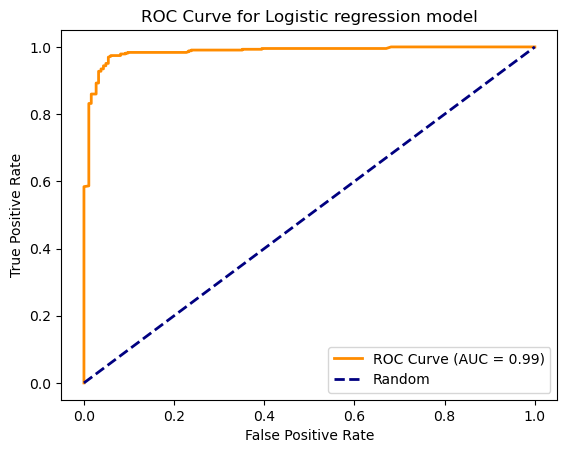

In [61]:
#Plotting ROC curve
y_pred_train = bestlogModel.predict(X_train_back)
accuracy = accuracy_score(y_train, y_pred_train)
y_prob = bestlogModel.predict_proba(X_train_back)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic regression model')
plt.legend(loc="lower right")

<b>The model performs well on the test set (>94% accuracy) and has a high Area under the curve (AUC = 0.99) of ROC curve indicating good performance to distinguish between those who have heart disease and those who don't.</b> 

## 6: Summary

<ul>
    <li>Data exploration identified several individuals for whom serum cholesterol was 0. These individuals were excluded from analysis</li>
    <li>Data exploration also revealed several individuals for whom the slope was specified to be 0 which is not one of the possible choices. These individuals were also excluded from the analysis.</li>
    <li>Conducted correlation analysis and univariate logistic regression as well as chi square tests to identify significant relationships between numerical as well as categorical features and the target (absence of presence of heart disease) which is a categorical feature. </li>
    <li>Categorical features which were significantly associated with target (based on $\chi ^2$ test and a significance threshold of 0.05) were:
        <ul>
            <li> slope </li>
            <li> chest pain </li>
            <li> no. of major vessels </li>
            <li> resting ECG result </li>
            <li> fasting blood sugar </li>
            <li> gender </li>
        </ul>
    </li>
    <li> Numerical features which were significantly associated with target (based on logistic regression and AUC threshold of 0.6) were: <ul>
        <li>resting BP</li>
        <li>serum cholesterol</li>
        <li>max heart rate</li>
        </ul>
    </li>
    </ul>
<b>Machine learning summary</b>
    <ul>
    <li>Univariate statistics doesn't explain complex relationships between the target and features. Therefore, I applied machine learning to investigate these complex relationships. Since the application is relevant for clinical field, I am interested in interpretable models. </li>
    <li>I used 10-fold cross-validation to assess the model performance on the training set.</li>
    <li>There are 12 features, so I wanted to identify the relevant features for the model. I used two methods: <ul>
        <li> Logistic regression with Lasso regularisation: This forces the non-relevant features' coefficient to become 0. This helped in ruling out one of the features. </li>
        <li> Backward elimination: This identified a set of 5 features which also result in similar accuracy as the 12 feature model. </li>
        It is important to scale the features before performing Logistic regression. Training data was scaled using autoscaling method and the same parameters were used for scaling test set.</ul>
        <li> I then compared the performance of logistical regression model with 5 features with various other models including k-nearest neighbour classifer, support vector classifier (linear as well as kernel (rbf)), naive bayes classifier, decision tree classifier and random forests classifier. </li>
    <li>Logistic regression outperformed several of these models in terms of test set accuracy and also benefits from interpretability so selected this further for hyperparameter tuning.</li>
        <li> Tuned 'C' (Inverse of regularization strength) and solver hyperparameters for Logistic regression and built the final model. </li>
        <li> The key features* of this model are: 
            <ul>
                <li>slope</li>
                <li>oldpeak</li>
                <li>chest pain</li>
                <li>resting ECG result</li>
                <li>gender</li>
                *Please note that the features should be scaled prior to prediction using the same scaling factor which was derived from the training set.
            </ul>
        </li>  
    <li> Optimised the threshold probability of the model to maximise the test set accuracy. </li>
    </ul>

The probability of presence of heart disease is given by solving the following equation:  
<br>
$$\ln \Big(\frac{p}{1-p}\Big) = b_0 + b_1*scaled\_gender + b_2*scaled\_chestpain + b_3*scaled\_restingrelectro + b_4*scaled\_oldpeak + b_5*scaled\_slope$$

$$ p = \frac{1}{1+exp(b_0 + b_1*scaled\_gender + b_2*scaled\_chestpain + b_3*scaled\_restingrelectro + b_4*scaled\_oldpeak + b_5*scaled\_slope)}$$

where, $b_0 = 3.1856708$, $b_1 = 0.67344694, b_2=1.10716387,b_3=0.84976867,b_4=-1.28893841,b_5= 3.84886661$ <br><br>
<b>*Please note that the features should be scaled prior to prediction using the same scaling factor which was derived from the training set.</b><br><br>
If $p>0.51$ then the individual is likely to have heart disease. 

<b>This model can predict the presence of heart disease with more than $94.81\%$ accuracy based on 5 features. Slope, oldpeak and resting ECG relate to ECG. Gender and chest pain are two additional parameters which are used by the model in making the prediction. </b>

### 7 Appendix: Guide for clinicians on implementing this model:

### 7.1: Data collection and encoding
<ul>
    <li>Gender: Assign <ul>
        <li>0 for female </li>
        <li> 1 for male</li>
        </ul>
    </li>
    <li>Chest pain: Assign <ul>
        <li>0 for Typical angina</li>
        <li>1 for Atypical angina</li>
        <li>2 for Non-anginal pain </li>
        <li>3 for Asymptomatic patient</li></ul>
    </li>
    <li>Resting ECG results: Assign<ul>
        <li>0 for Normal</li>
        <li>1 for Having ST-T wave abnormality</li>
        <li>2 for showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
        </ul>
    </li>
    <li>Old peak: Value of ST (measure of abnormality in electrocardiograms) between 0 and 6.2.</li>
    <li>Slope: Slope of the peak exercise ST segment, assign<ul>
        <li>1 for upwards</li>
        <li>2 for flat</li>
        <li>3 for downward</li>
        </ul>
    </li>
    </ul>

### 7.2 Data scaling

Perform data scaling by subtracting the mean and dividing by the scale factor for each feature. For each feature, the corresponding mean and scale factor are shown below:

In [62]:
feature_index = [1,2,6,9,10]
mean = []
scale = []
feature = []
for index in feature_index:
    feature.append(scaling_dict_df['Feature'][index])
    mean.append(scaling_dict_df['Mean'][index])
    scale.append(scaling_dict_df['Scale'][index])
final_feature_scale_dict = {'Feature': feature, 
                           'Mean': mean, 
                           'Scale': scale}
final_feature_scale_df = pd.DataFrame(final_feature_scale_dict)
final_feature_scale_df

,Feature,Mean,Scale
0,gender,0.732463,0.442675
1,chestpain,1.127243,0.957562
2,restingrelectro,0.815661,0.777088
3,oldpeak,2.799347,1.677371
4,slope,1.879282,0.773824


#### 7.2.1 Example of scaling

Say, the individual has the following data: 
<ul>
    <li> Gender: 0</li>
    <li> Chest pain: 1</li>
    <li> Resting ECG results: 1</li>
    <li> Old peak: 1 </li>
    <li> Slope: 2 </li>
</ul>
You can start by putting this in a list using the following command:    

In [63]:
ex_data = np.array([0.,1.,1.,1.,2.]) #Make sure the order of data is entered correctly

In [64]:
for i in range(len(ex_data)):
    ex_data[i] =  (ex_data[i]-mean[i])/scale[i]

print(ex_data)

[-1.65463134 -0.13288232  0.23721809 -1.07271909  0.15600154]


In [65]:
y_prob_ex_data = bestlogModel.predict_proba(ex_data.reshape(1,-1)) 
#.reshape(1,-1) should be dropped if more than one rows are used in the input dataset
print(y_prob_ex_data) 
#first value is the probability for absence of heart disease and second is the probability for presence of heart disease

[[0.01616006 0.98383994]]


In [66]:
#optimal threshold is 0.51
if y_prob_ex_data[0][1]>optimal_threshold:
    print('The individual is predicted to have heart disease')
else:
    print('The individual is predicted to not have heart disease')

The individual is predicted to have heart disease
